[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
74/74 [==============================] - 2s 5ms/step - loss: 0.0041
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 8.4476e-05
Epoch 3/50
74/74 [==============================] - 0s 5ms/step - loss: 3.8028e-05
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 3.5474e-05
Epoch 5/50
74/74 [==============================] - 0s 6ms/step - loss: 3.7377e-05
Epoch 6/50
74/74 [==============================] - 0s 5ms/step - loss: 3.3757e-05
Epoch 7/50
74/74 [==============================] - 0s 5ms/step - loss: 3.3807e-05
Epoch 8/50
74/74 [==============================] - 0s 5ms/step - loss: 3.2917e-05
Epoch 9/50
74/74 [==============================] - 0s 5ms/step - loss: 3.2554e-05
Epoch 10/50
74/74 [==============================] - 0s 5ms/step - loss: 3.3465e-05
Epoch 11/50
74/74 [==============================] - 0s 6ms/step - loss: 3.4082e-05
Epoch 12/50
74/74 [=

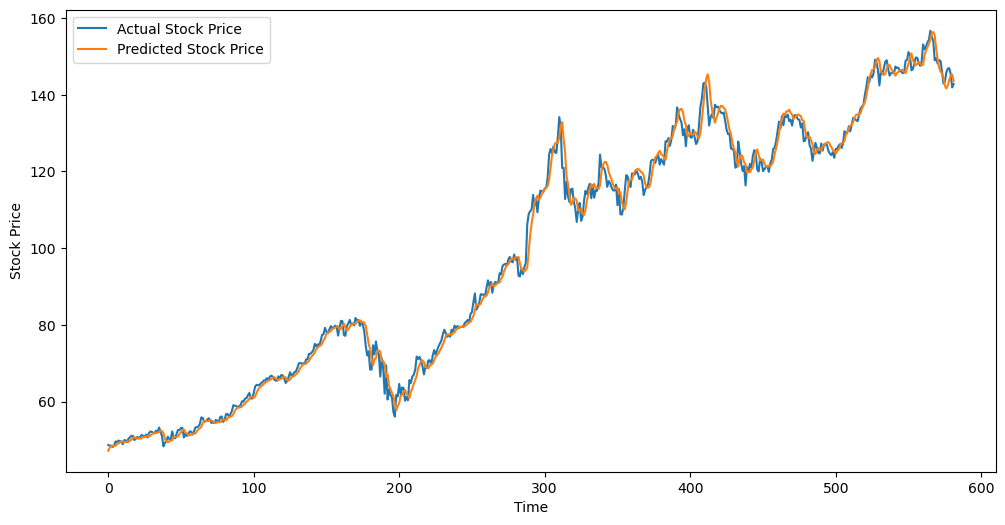

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf  # To get stock data
get_ipython().run_line_magic('matplotlib', 'inline')


stock_symbol = "AAPL"  
start_date = "2010-01-01"
end_date = "2021-09-30"

df = yf.download(stock_symbol, start=start_date, end=end_date)


data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)


predicted_stock_prices = model.predict(X_test)

predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
y_test = scaler.inverse_transform(y_test)


plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Stock Price")
plt.plot(predicted_stock_prices, label="Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

